# **Final Project**

**DOTA 2 Win Prediction, Using Hero, Item, and Both**

**1. Business Understanding**

      - Dota 2 is a MOBA game
      - Dota 2 is a popular MOBA available as free to play, and can take up thousands of hours of your life. 
      - There are lot of E-sports team that play this game
      - Every E-sports team need some insight to win a match
      - 2 Major Variables in this game are Heroes and Items
          Heroes : The character we play in this game
          Items  : The equipment that can make our hero stronger

**2. Business Question**

      - Are Heroes and Items can make team win?
      - Which is more important hero/item?

**3. Data Understanding**

      - Data was taken from Kaggle :
        https://www.kaggle.com/devinanzelmo/dota-2-matches

# **DATA PREPARATION**



In [ ]:
#1 Load Packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates 
from datetime import datetime
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import sklearn.metrics as metrics
import io
from scipy import misc
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_val_score
import pydotplus
from matplotlib.pyplot import imread
from sklearn.externals.six import StringIO  
from IPython.display import Image  

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.8 MB 7.7 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.18.2 requires pandas>=1.0, but you have pandas 0.23.4 which is incompatible.
pymc3 3.11.2 requires pandas>=0.24.0, but you have pandas 0.23.4 which is incompatible.
plotnine 0.6.0 requires pandas>=0.25.0, but you have pandas 0.23.4 which is incompatible.
mizani 0.6.0 requires pandas>=0.25.0, but you have pandas 0.23.4 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 0.23.4 which is incompatible.
fbprophet 0.7.1 requires pandas>=1.0.4, but you have pandas 0.23.4 which is incompatible.


In [ ]:
# mounted google drive
import google.colab as gc
gc.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# check the path
!pwd

/content


In [ ]:
# change folder
%cd '/content/drive/My Drive/Dibimbing/Data buat final project/'

/content/drive/My Drive/Dibimbing/Data buat final project


In [ ]:
#check file in the folder
!ls

ability_ids.csv       objectives.csv	      test_labels.csv
ability_upgrades.csv  patch_dates.csv	      test_player.csv
chat.csv	      player_ratings.csv      tree2.png
cluster_regions.csv   players.csv	      tree3.png
hero_names.csv	      player_time.csv	      tree.png
item_ids.csv	      purchase_log.csv	      winning.png
match.csv	      teamfights.csv	      yasp_sample.json
match_outcomes.csv    teamfights_players.csv


# **EDA & DATASET CREATION**

**1. Creating Dataset**

In [ ]:
#read the data
players = pd.read_csv('players.csv')
matches = pd.read_csv('match.csv')
heroes = pd.read_csv('hero_names.csv')
items = pd.read_csv('item_ids.csv')

In [ ]:
players.head(10)

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,assists,denies,last_hits,stuns,hero_damage,hero_healing,tower_damage,item_0,item_1,item_2,item_3,item_4,item_5,level,leaver_status,xp_hero,xp_creep,xp_roshan,xp_other,gold_other,gold_death,gold_buyback,gold_abandon,gold_sell,gold_destroying_structure,gold_killing_heros,gold_killing_creeps,gold_killing_roshan,gold_killing_couriers,unit_order_none,unit_order_move_to_position,unit_order_move_to_target,unit_order_attack_move,unit_order_attack_target,unit_order_cast_position,unit_order_cast_target,unit_order_cast_target_tree,unit_order_cast_no_target,unit_order_cast_toggle,unit_order_hold_position,unit_order_train_ability,unit_order_drop_item,unit_order_give_item,unit_order_pickup_item,unit_order_pickup_rune,unit_order_purchase_item,unit_order_sell_item,unit_order_disassemble_item,unit_order_move_item,unit_order_cast_toggle_auto,unit_order_stop,unit_order_taunt,unit_order_buyback,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
0,0,0,86,0,3261,10960,347,362,9,3,18,1,30,76.7356,8690,218,143,180,37,73,56,108,0,16,0,8840.0,5440.0,NaN,83.0,50.0,-957.0,NaN,NaN,212.0,3120.0,5145.0,1087.0,400.0,NaN,NaN,4070.0,1.0,25.0,416.0,51.0,144.0,3.0,71.0,NaN,188.0,16.0,NaN,NaN,NaN,2.0,35.0,2.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,51,1,2954,17760,494,659,13,3,18,9,109,87.4164,23747,0,423,46,63,119,102,24,108,22,0,14331.0,8440.0,2683.0,671.0,395.0,-1137.0,NaN,NaN,1650.0,3299.0,6676.0,4317.0,937.0,NaN,NaN,5894.0,214.0,165.0,1031.0,98.0,39.0,4.0,439.0,NaN,346.0,22.0,NaN,NaN,12.0,52.0,30.0,4.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,83,2,110,12195,350,385,0,4,15,1,58,None,4217,1595,399,48,60,59,108,65,0,17,0,6692.0,8112.0,NaN,453.0,259.0,-1436.0,-1015.0,NaN,NaN,3142.0,2418.0,3697.0,400.0,NaN,NaN,7053.0,3.0,132.0,645.0,36.0,160.0,20.0,373.0,NaN,643.0,17.0,5.0,NaN,7.0,8.0,28.0,NaN,1.0,18.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2,11,3,1179,22505,599,605,8,4,19,6,271,None,14832,2714,6055,63,147,154,164,79,160,21,0,8583.0,14230.0,894.0,293.0,100.0,-2156.0,NaN,NaN,938.0,4714.0,4104.0,10432.0,400.0,NaN,NaN,4712.0,133.0,163.0,690.0,9.0,15.0,7.0,406.0,NaN,150.0,21.0,NaN,NaN,1.0,9.0,45.0,7.0,NaN,14.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,3,67,4,3307,23825,613,762,20,3,17,13,245,None,33740,243,1833,114,92,147,0,137,63,24,0,15814.0,14325.0,NaN,62.0,NaN,-1437.0,-1056.0,NaN,4194.0,3217.0,7467.0,9220.0,400.0,NaN,NaN,3853.0,7.0,7.0,1173.0,31.0,84.0,8.0,198.0,NaN,111.0,23.0,1.0,NaN,NaN,2.0,44.0,6.0,NaN,13.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN
5,0,4,106,128,476,12285,397,524,5,6,8,5,162,None,10725,0,112,145,73,149,48,212,0,19,0,8502.0,12259.0,NaN,1.0,NaN,-2394.0,-2240.0,NaN,200.0,320.0,5281.0,6193.0,NaN,NaN,NaN,6593.0,166.0,76.0,832.0,196.0,3.0,5.0,96.0,2.0,161.0,19.0,NaN,NaN,2.0,NaN,36.0,3.0,NaN,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
6,0,0,102,129,317,10355,303,369,4,13,5,2,107,None,15028,764,0,50,11,102,36,185,81,16,0,5201.0,9417.0,NaN,1.0,NaN,-3287.0,NaN,NaN,262.0,320.0,3396.0,4356.0,NaN,NaN,NaN,3325.0,63.0,100.0,609.0,13.0,173.0,14.0,168.0,NaN,118.0,16.0,NaN,NaN,1.0,1.0,43.0,3.0,NaN,13.0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
7,0,5,46,130,2390,13395,452,517,4,8,6,31,208,None,10230,0,2438,41,63,36,147,168,21,19,0,6853.0,13396.0,NaN,244.0,107.0,-3682.0,NaN,NaN,242.0,695.0,4350.0,8797.0,NaN,NaN,NaN,13557.0,11.0,214.0,3386.0,122.0,NaN,3.0,506.0,NaN,491.0,18.0,2.0,3.0,18.0,18.0,30.0,1.0,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,110.0,NaN,NaN,NaN,NaN,NaN
8,0,0,7,131,475,5035,189,223,1,14,8,0,27,67.0277,4774,0,0,36,0,0,46,0,180,12,0,4798.0,4038.0,NaN,27.0,NaN,-3286.0,-39.0,NaN,NaN,320.0,2127.0,1089.0,NaN,NaN,NaN,2217.0,55.

*Since we only analyze Hero & Item Variables, so we only need missing value information on hero_id and items variables*

In [ ]:
#Checking Missing Value on hero_id and item_0 to item_5
print("Number of null values in hero_id : " + 
       str(players.iloc[:, 3].isnull().sum()))
print("Number of null values in item_0 : " + 
       str(players.iloc[:, 18].isnull().sum()))
print("Number of null values in item_1 : " + 
       str(players.iloc[:, 19].isnull().sum()))
print("Number of null values in item_2 : " + 
       str(players.iloc[:, 20].isnull().sum()))
print("Number of null values in item_3 : " + 
       str(players.iloc[:, 21].isnull().sum()))
print("Number of null values in item_4 : " + 
       str(players.iloc[:, 22].isnull().sum()))
print("Number of null values in item_5 : " + 
       str(players.iloc[:, 23].isnull().sum()))


Number of null values in hero_id : 0
Number of null values in item_0 : 0
Number of null values in item_1 : 0
Number of null values in item_2 : 0
Number of null values in item_3 : 0
Number of null values in item_4 : 0
Number of null values in item_5 : 0


*Since there are no missing value in the hero_id and item variables, we can make the Heroes Column and Items Column*

In [ ]:
#Map/Translating the hero_id
hero_lookup = dict(zip(heroes['hero_id'], heroes['localized_name']))
hero_lookup[0] = 'Unknown'
players['hero'] = players['hero_id'].apply(lambda _id: hero_lookup[_id])

In [ ]:
#Map Hero Column
item_lookup = dict(zip(items['item_id'], items['item_name']))
item_lookup[0] = 'Unknown'

def find_item(_id) :
  return item_lookup.get(_id, 'u_' + str(_id))

players['item_0'] = players['item_0'].apply(find_item)
players['item_1'] = players['item_1'].apply(find_item)
players['item_2'] = players['item_2'].apply(find_item)
players['item_3'] = players['item_3'].apply(find_item)
players['item_4'] = players['item_4'].apply(find_item)
players['item_5'] = players['item_5'].apply(find_item)

In [ ]:
#get dummies for each player hero
player_heroes = pd.get_dummies(players['hero'])

In [ ]:
player_heroes.head(10)

,Abaddon,Alchemist,Ancient Apparition,Anti-Mage,Axe,Bane,Batrider,Beastmaster,Bloodseeker,Bounty Hunter,Brewmaster,Bristleback,Broodmother,Centaur Warrunner,Chaos Knight,Chen,Clinkz,Clockwerk,Crystal Maiden,Dark Seer,Dazzle,Death Prophet,Disruptor,Doom,Dragon Knight,Drow Ranger,Earth Spirit,Earthshaker,Elder Titan,Ember Spirit,Enchantress,Enigma,Faceless Void,Gyrocopter,Huskar,Invoker,Io,Jakiro,Juggernaut,Keeper of the Light,...,Razor,Riki,Rubick,Sand King,Shadow Demon,Shadow Fiend,Shadow Shaman,Silencer,Skywrath Mage,Slardar,Slark,Sniper,Spectre,Spirit Breaker,Storm Spirit,Sven,Techies,Templar Assassin,Terrorblade,Tidehunter,Timbersaw,Tinker,Tiny,Treant Protector,Troll Warlord,Tusk,Undying,Unknown,Ursa,Vengeful Spirit,Venomancer,Viper,Visage,Warlock,Weaver,Windranger,Winter Wyvern,Witch Doctor,Wraith King,Zeus
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#get dummies, for each player item
item0 = pd.get_dummies(players['item_0'].fillna(0))
item1 = pd.get_dummies(players['item_1'].fillna(0))
item2 = pd.get_dummies(players['item_2'].fillna(0))
item3 = pd.get_dummies(players['item_3'].fillna(0))
item4 = pd.get_dummies(players['item_4'].fillna(0))
item5 = pd.get_dummies(players['item_5'].fillna(0))

In [ ]:
#sum the item column to count the number of items per kind of item per player
player_items = item0 \
    .add(item1, fill_value=0) \
    .add(item2, fill_value=0) \
    .add(item3, fill_value=0) \
    .add(item4, fill_value=0) \
    .add(item5, fill_value=0)

In [ ]:
#create a column names for every hero name for every team
radiant_cols = list(map(lambda s: 'radiant_' + s, player_heroes.columns.values))
dire_cols = list(map(lambda s: 'dire_' + s, player_heroes.columns.values))

In [ ]:
#create a column name for every item nem for every team
radiant_items_cols = list(map(lambda s: 'radiant_' + str(s), player_items.columns.values))
dire_items_cols = list(map(lambda s: 'dire_' + str(s), player_items.columns.values))

In [ ]:
#Creating Target Variables 
# X (For Model 1), X1 (For Model 2), X2 (For Model 3)

X = None

radiant_heroes = []
dire_heroes = []
radiant_items = []
dire_items = []

for _id, _index in players.groupby('match_id').groups.items():
    radiant_heroes.append(player_heroes.iloc[_index][:5].sum().values)
    dire_heroes.append(player_heroes.iloc[_index][5:].sum().values)
    radiant_items.append(player_items.iloc[_index][:5].sum().values)
    dire_items.append(player_items.iloc[_index][5:].sum().values)

radiant_heroes = pd.DataFrame(radiant_heroes, columns=radiant_cols)
dire_heroes = pd.DataFrame(dire_heroes, columns=dire_cols)
radiant_items = pd.DataFrame(radiant_items, columns=radiant_items_cols)
dire_items = pd.DataFrame(dire_items, columns=dire_items_cols)

X = pd.concat([radiant_heroes, radiant_items, dire_heroes, dire_items], axis=1)
X1 = pd.concat([radiant_heroes,dire_heroes], axis=1)
X2 = pd.concat([radiant_items, dire_items], axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 612 entries, radiant_Abaddon to dire_yasha
dtypes: float64(390), int64(222)
memory usage: 233.5 MB


In [ ]:
X1.head()

In [ ]:
X2.head()

In [ ]:
#Encode the Target Column
y = matches['radiant_win'].apply(lambda win: 1 if win else 0)
classes = ['Dire Win', 'Radiant Win']

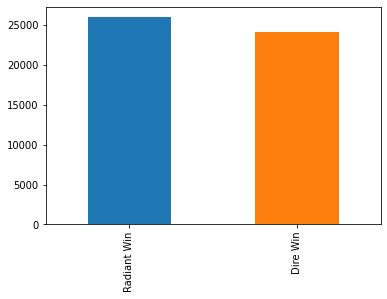

In [ ]:
#See the comparison
_ = pd.Series(y).apply(lambda i: classes[i]).value_counts().plot('bar')

# **PREDICTIVE MODELING**

**I'm going to use Decision Tree Model**

#**Model 1, Predicting using Heroes & Items**

In [ ]:
#train test model 1
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y,
    train_size=0.8,
    random_state=0
    )

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8295


In [ ]:
#Visualizing Model 1
def show_tree(decisionTree, file_path):
    dotfile = io.StringIO()
    export_graphviz(decisionTree, 
                    max_depth=4,
                    label=None,
                    impurity=False,
                    filled=True,
                    rounded=True,
                    proportion=False,
                    rotate=True,
                    out_file=dotfile, 
                    class_names=classes, 
                    feature_names=X.columns)
    pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png(file_path)
    i = imread(file_path)
    plt.figure(figsize=(100,100))
    plt.imshow(i, interpolation='nearest')

In [ ]:
def build_decision_tree(X, y, depth=None):
    dt = DecisionTreeClassifier(random_state=42, max_depth=depth)
    print('CV score:', cross_val_score(estimator=dt, X=X, y=y).mean())
    dt.fit(X, y)
    show_tree(dt, 'tree.png')
    return dt

CV score: 0.8384199999999999


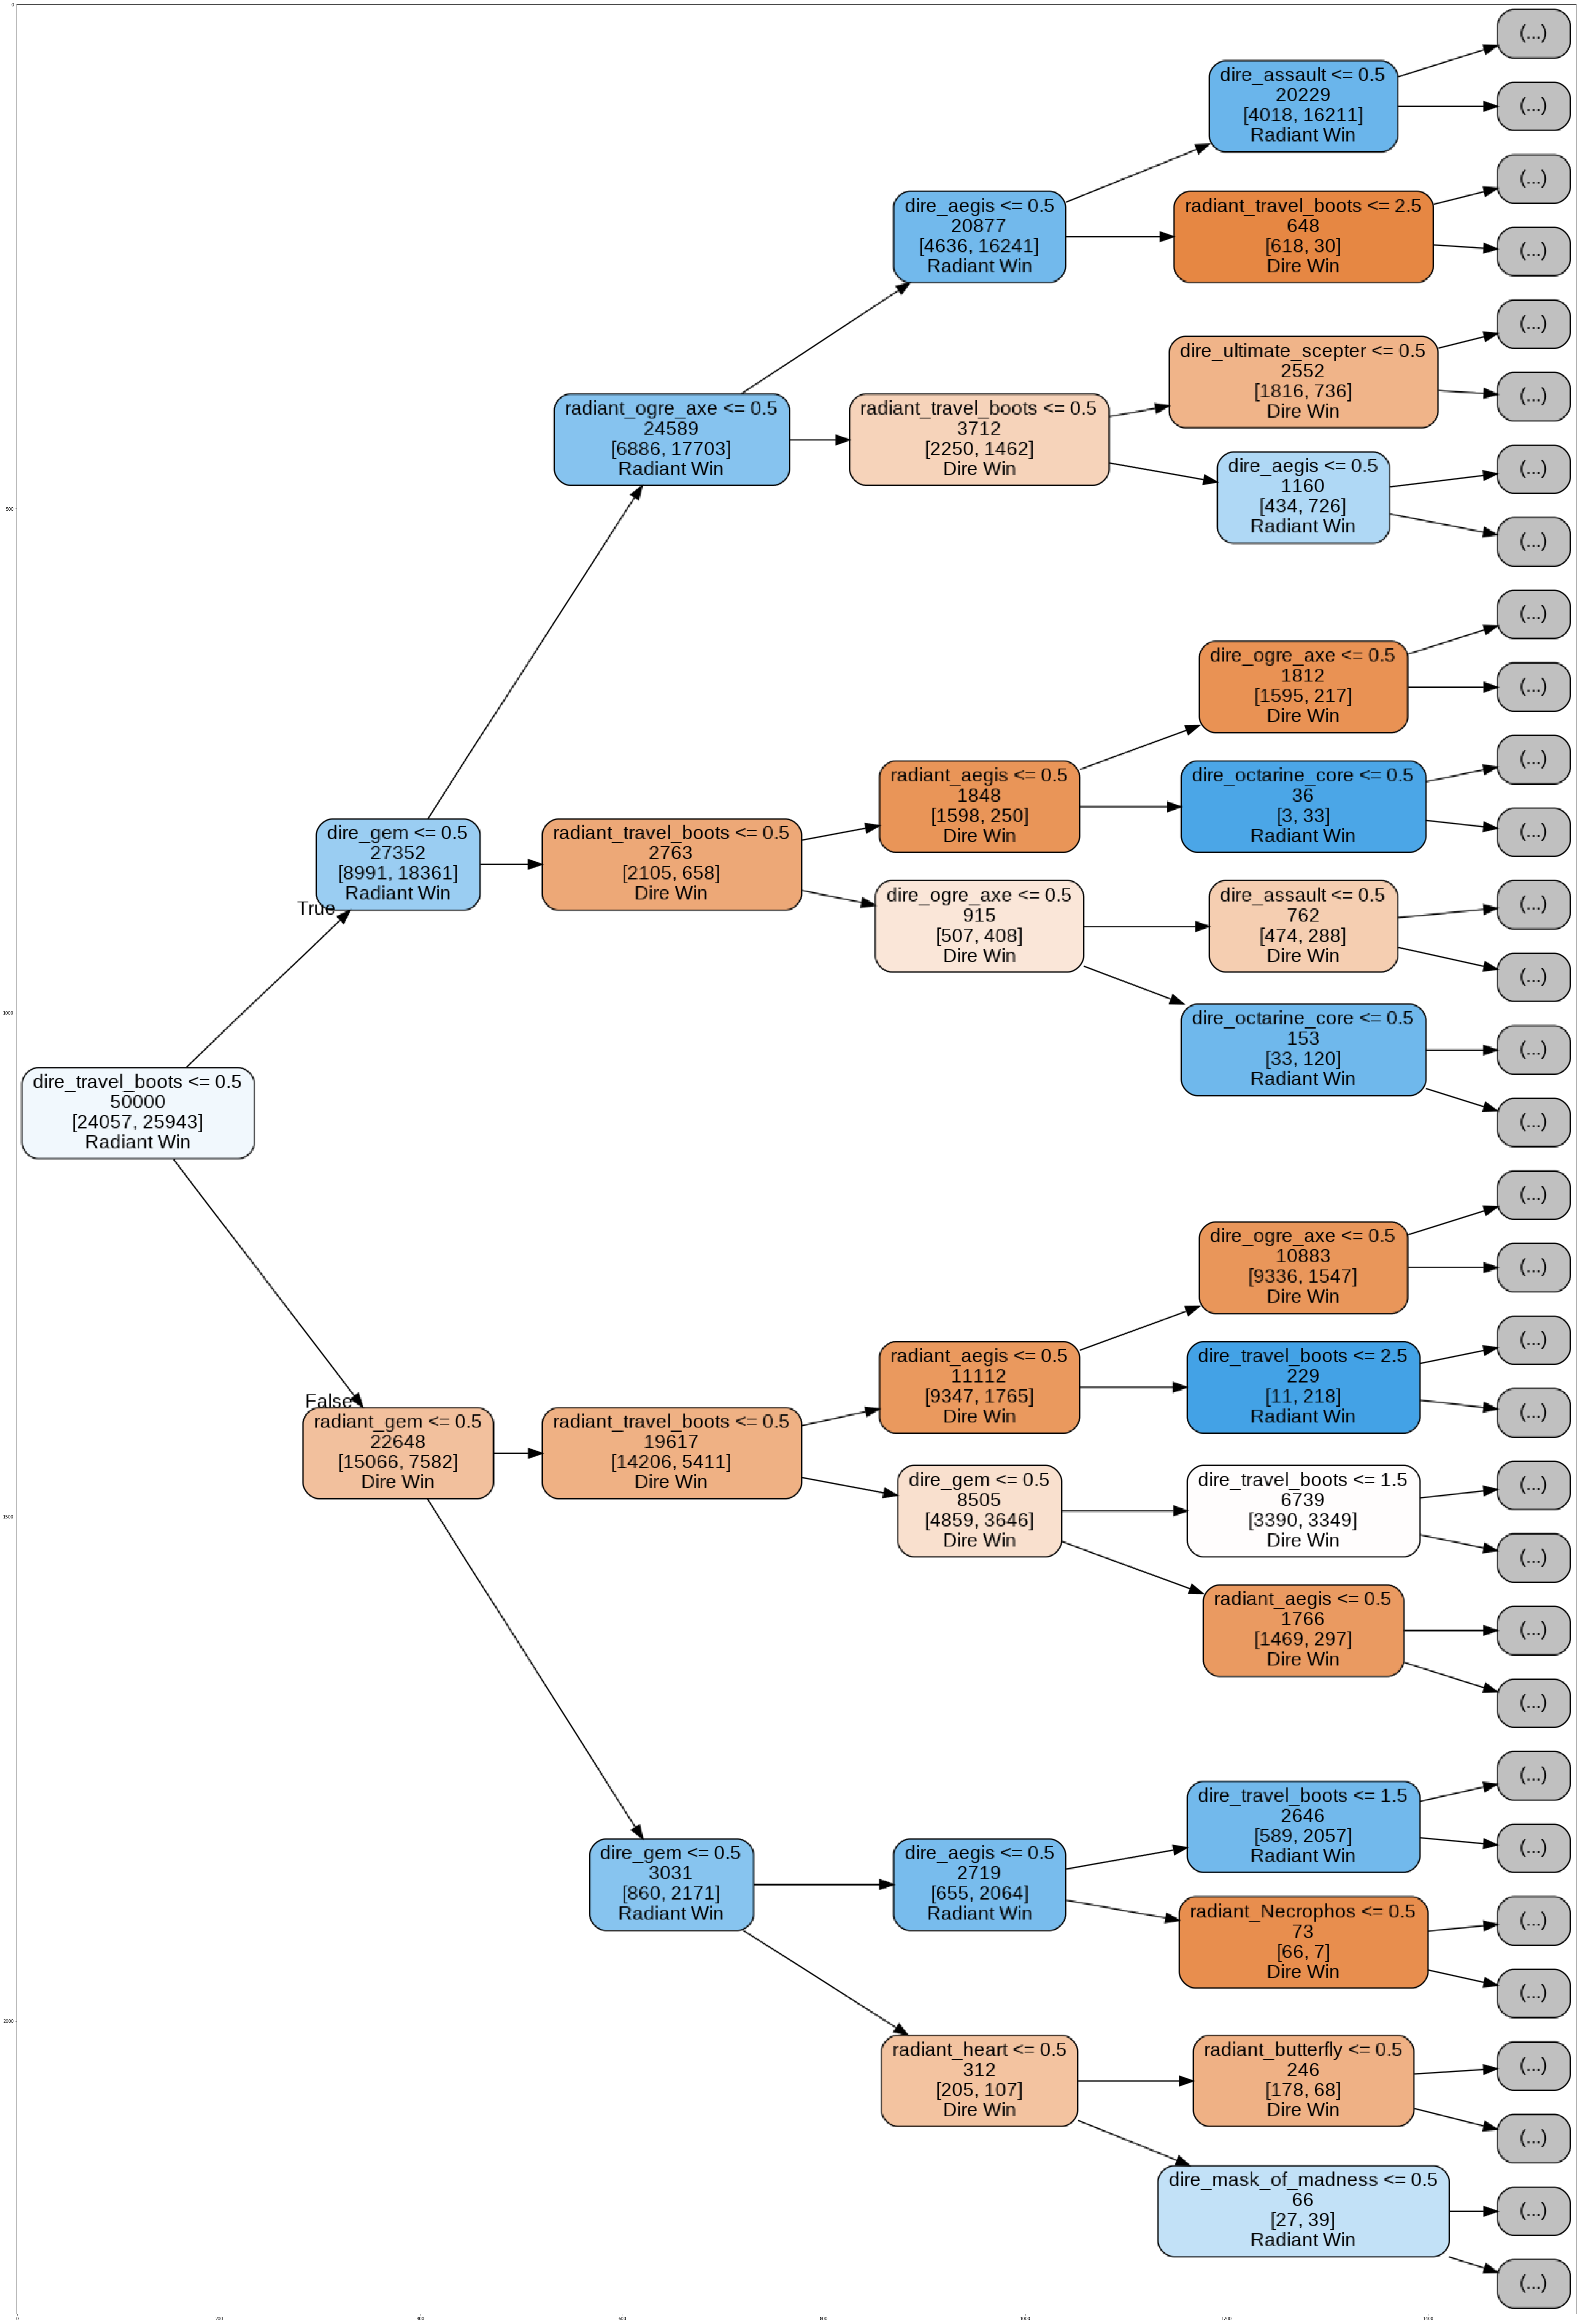

In [ ]:
dt = build_decision_tree(X=X, y=y, depth=10)

In [ ]:
def get_tree_stats(dt):
    feature_importances = dict(zip(X.columns, dt.feature_importances_))
    feature_importances = pd.Series(feature_importances).sort_values(ascending=False)
    return feature_importances.iloc[feature_importances.nonzero()]

get_tree_stats(dt).head(20)

dire_travel_boots          0.203223
dire_gem                   0.104874
radiant_travel_boots       0.103673
radiant_gem                0.077311
radiant_ogre_axe           0.062642
dire_aegis                 0.059328
dire_assault               0.047569
radiant_Unknown            0.040661
radiant_aegis              0.033091
dire_butterfly             0.028862
dire_ogre_axe              0.025828
radiant_assault            0.020026
dire_Unknown               0.018916
dire_guardian_greaves      0.018145
dire_ultimate_scepter      0.013536
radiant_butterfly          0.012071
dire_abyssal_blade         0.010682
radiant_monkey_king_bar    0.010277
radiant_abyssal_blade      0.007701
dire_moon_shard            0.007699
dtype: float64

**Model 1 Insight**

As can be see, we have obtained a CV score of 83% and Accuracy at 82.85% - way above the 50-55% split. 
This shows that, the heroes and items are indeed predictive of victory or defeat in DOTA 2.

Important items are:

1. Boots of Travel

2. Gem of True Sight

3. Ogre Axe

4. Aegis (from Roshan)

5. Heart of Tarasque


The only hero mentioned in the upper portions of the decision tree is the Necrophos - one of the most effective mass healers in the game.

# **Model 2, Predicting using only Heroes**

In [ ]:
#train test model 2
X1_train, X1_test, y1_train, y1_test = model_selection.train_test_split(
    X1, y,
    train_size=0.8,
    random_state=0
    )

In [ ]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf1 = clf.fit(X1_train,y1_train)

#Predict the response for test dataset
y1_pred = clf.predict(X1_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))

Accuracy: 0.5271


In [ ]:
#Visualizing Model 2
def show_tree(decisionTree, file_path):
    dotfile = io.StringIO()
    export_graphviz(decisionTree, 
                    max_depth=4,
                    label=None,
                    impurity=False,
                    filled=True,
                    rounded=True,
                    proportion=False,
                    rotate=True,
                    out_file=dotfile, 
                    class_names=classes, 
                    feature_names=X1.columns)
    pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png(file_path)
    i = imread(file_path)
    plt.figure(figsize=(100,100))
    plt.imshow(i, interpolation='nearest')

In [ ]:
def build_decision_tree(X, y, depth=None):
    dt1 = DecisionTreeClassifier(random_state=42, max_depth=depth)
    print('CV score:', cross_val_score(estimator=dt1, X=X1, y=y).mean())
    dt1.fit(X1, y)
    show_tree(dt1, 'tree.png')
    return dt1

CV score: 0.5471600000000001


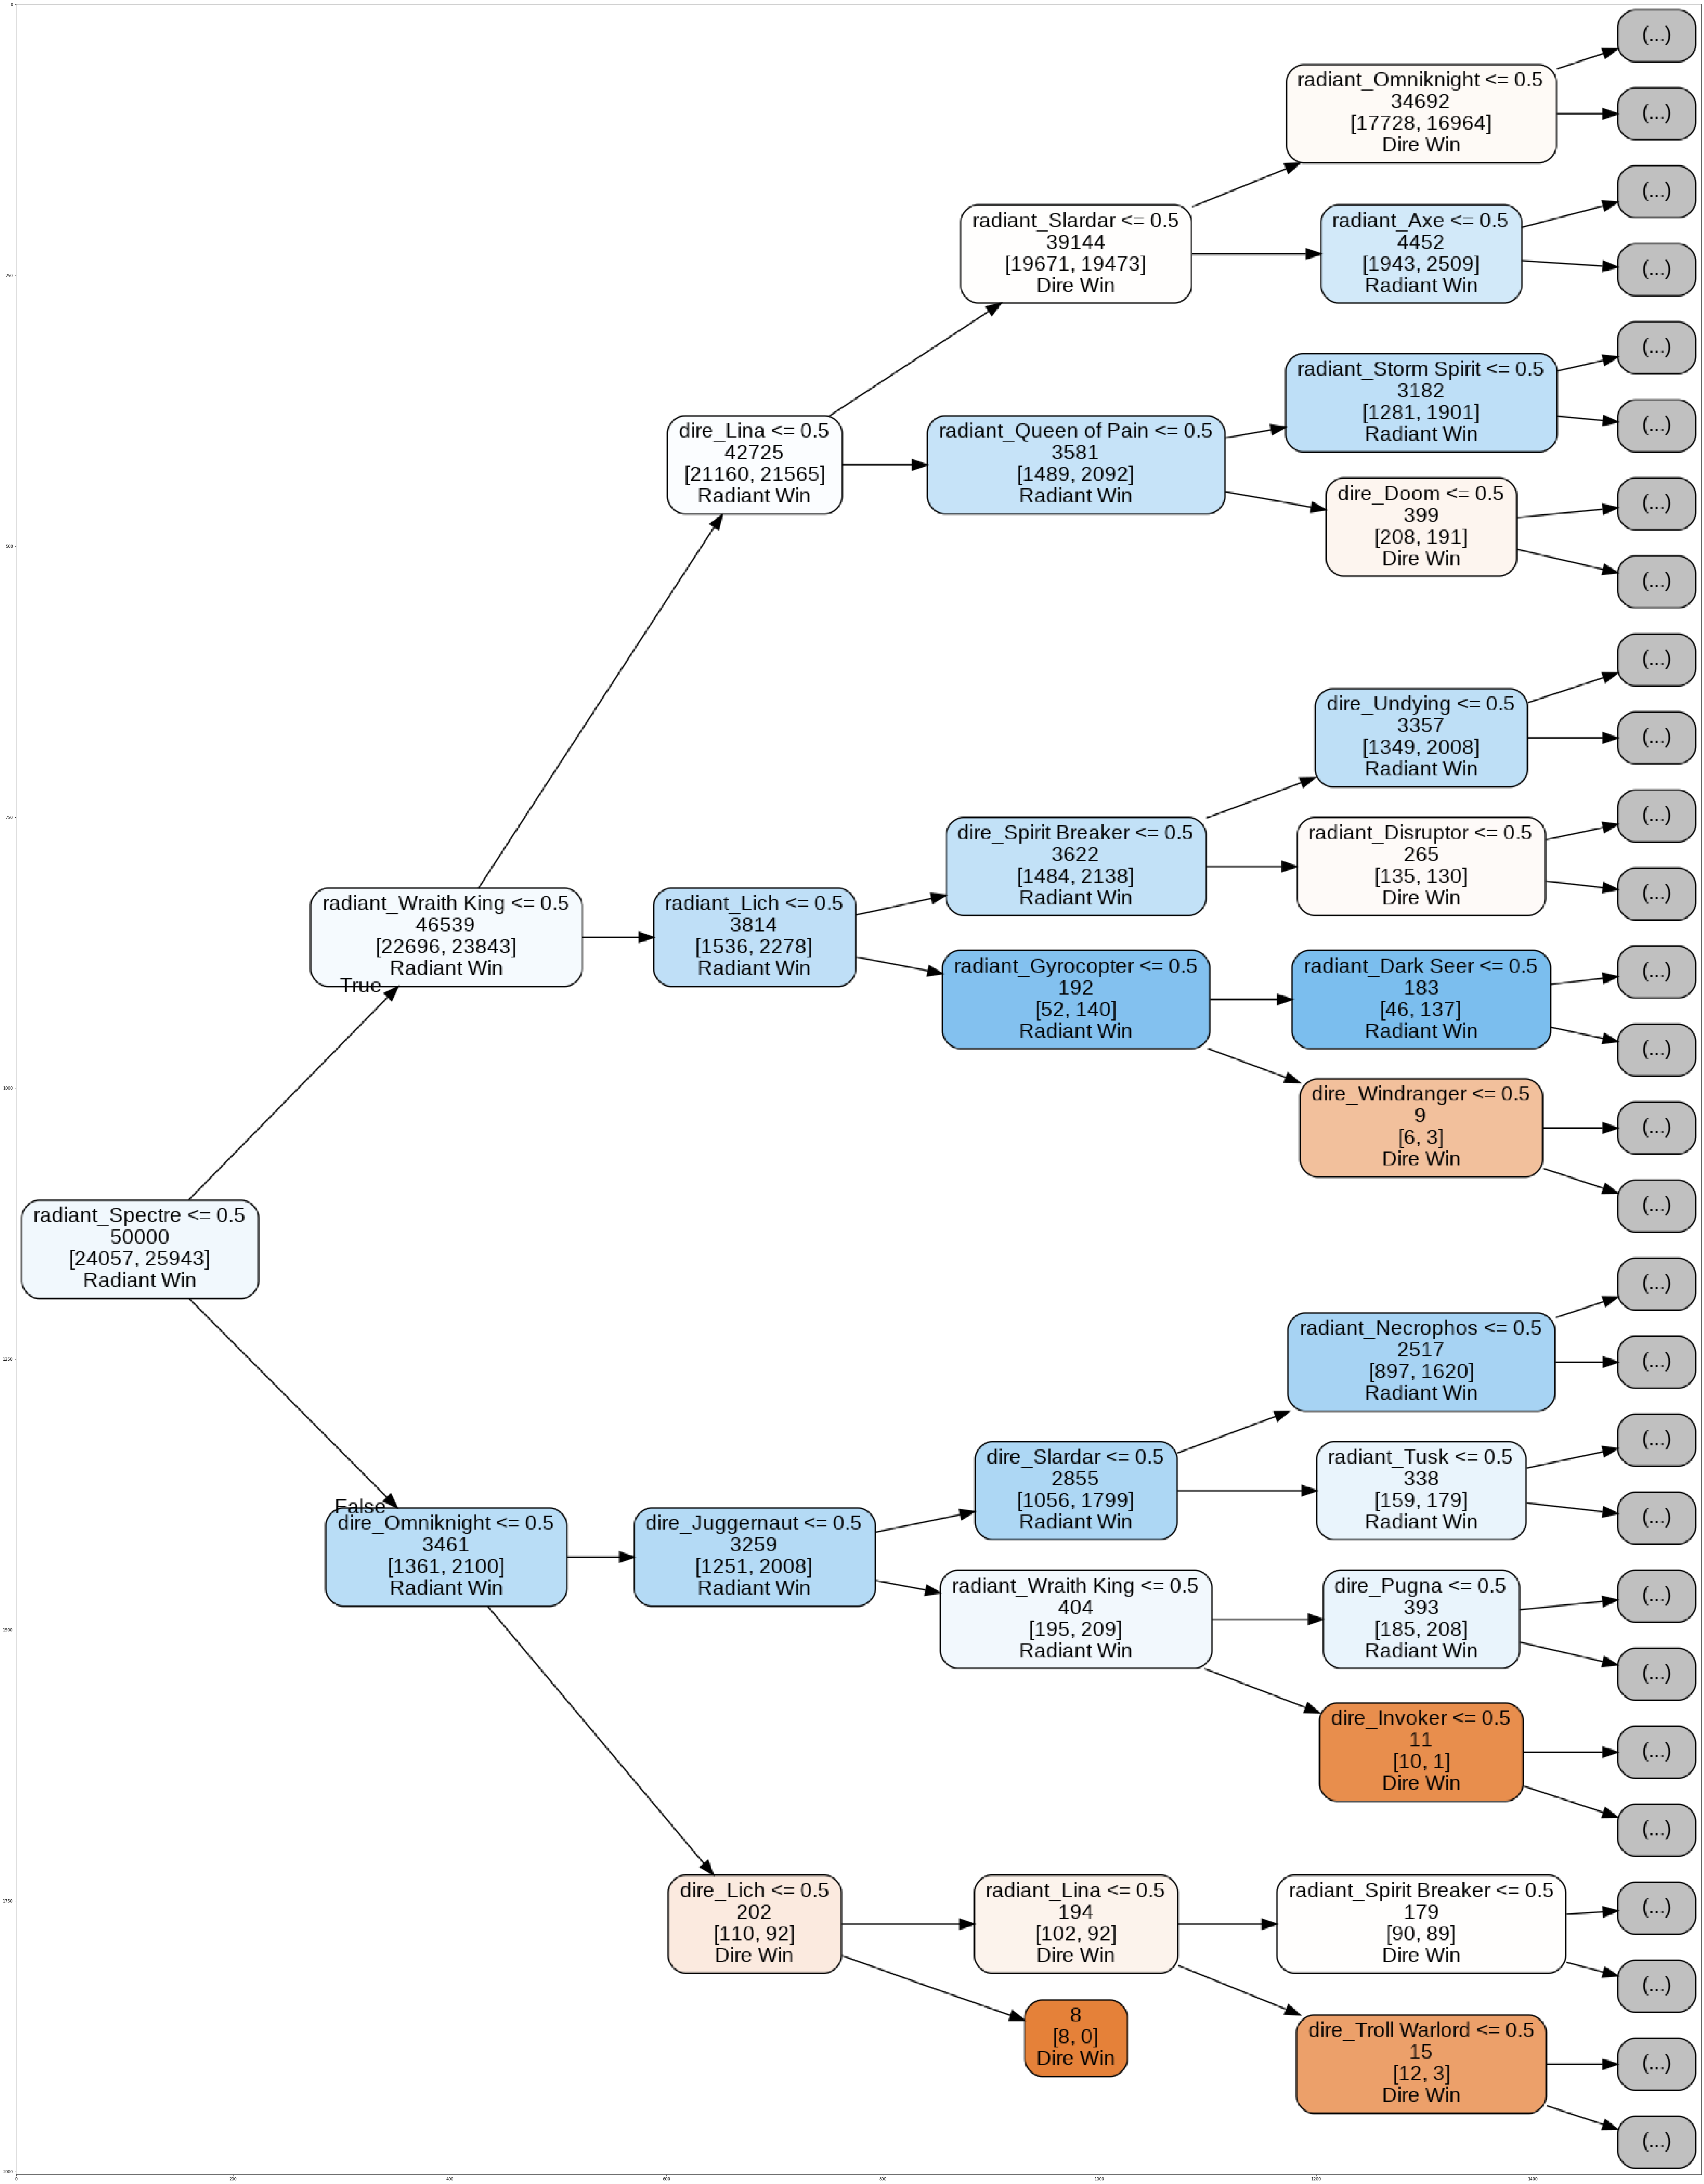

In [ ]:
dt1 = build_decision_tree(X=X1, y=y, depth=10)

In [ ]:
def get_tree_stats(dt1):
    feature_importances = dict(zip(X1.columns, dt1.feature_importances_))
    feature_importances = pd.Series(feature_importances).sort_values(ascending=False)
    return feature_importances.iloc[feature_importances.nonzero()]

get_tree_stats(dt1).head(20)

radiant_Wraith King      0.054934
radiant_Spectre          0.049264
dire_Lina                0.044144
radiant_Slardar          0.040278
radiant_Omniknight       0.038667
dire_Wraith King         0.035751
dire_Slardar             0.033474
dire_Spectre             0.032337
dire_Ursa                0.029664
dire_Queen of Pain       0.024996
dire_Omniknight          0.019444
dire_Undying             0.015791
radiant_Necrophos        0.015687
radiant_Storm Spirit     0.015371
radiant_Queen of Pain    0.014077
dire_Spirit Breaker      0.013766
radiant_Axe              0.013681
dire_Anti-Mage           0.013534
radiant_Dazzle           0.012951
radiant_Earthshaker      0.012360
dtype: float64

**Model 2 Insight**

As can be see, we have obtained a CV score of 54% and Accuracy at 52% - way close to the 50-55% split. 
This shows that, the heroes can be used to predict the victory or defeat in DOTA 2, but we need to add other variables to boost the CV and the Accuracy

Important items are:

1. Wraith King

2. Spectre

3. Lina

4. Slardar

5. Omniknight


# **Model 3, Predicting Using only Item**

In [ ]:
#train test model 1
X2_train, X2_test, y2_train, y2_test = model_selection.train_test_split(
    X2, y,
    train_size=0.8,
    random_state=0
    )

In [ ]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf2 = clf.fit(X2_train,y2_train)

#Predict the response for test dataset
y2_pred = clf2.predict(X2_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))

Accuracy: 0.8362


In [ ]:
#Visualizing Model 1
def show_tree(decisionTree, file_path):
    dotfile = io.StringIO()
    export_graphviz(decisionTree, 
                    max_depth=4,
                    label=None,
                    impurity=False,
                    filled=True,
                    rounded=True,
                    proportion=False,
                    rotate=True,
                    out_file=dotfile, 
                    class_names=classes, 
                    feature_names=X2.columns)
    pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png(file_path)
    i = imread(file_path)
    plt.figure(figsize=(100,100))
    plt.imshow(i, interpolation='nearest')

In [ ]:
def build_decision_tree(X, y, depth=None):
    dt2 = DecisionTreeClassifier(random_state=42, max_depth=depth)
    print('CV score:', cross_val_score(estimator=dt2, X=X2, y=y).mean())
    dt2.fit(X2, y)
    show_tree(dt2, 'tree.png')
    return dt2

CV score: 0.83916


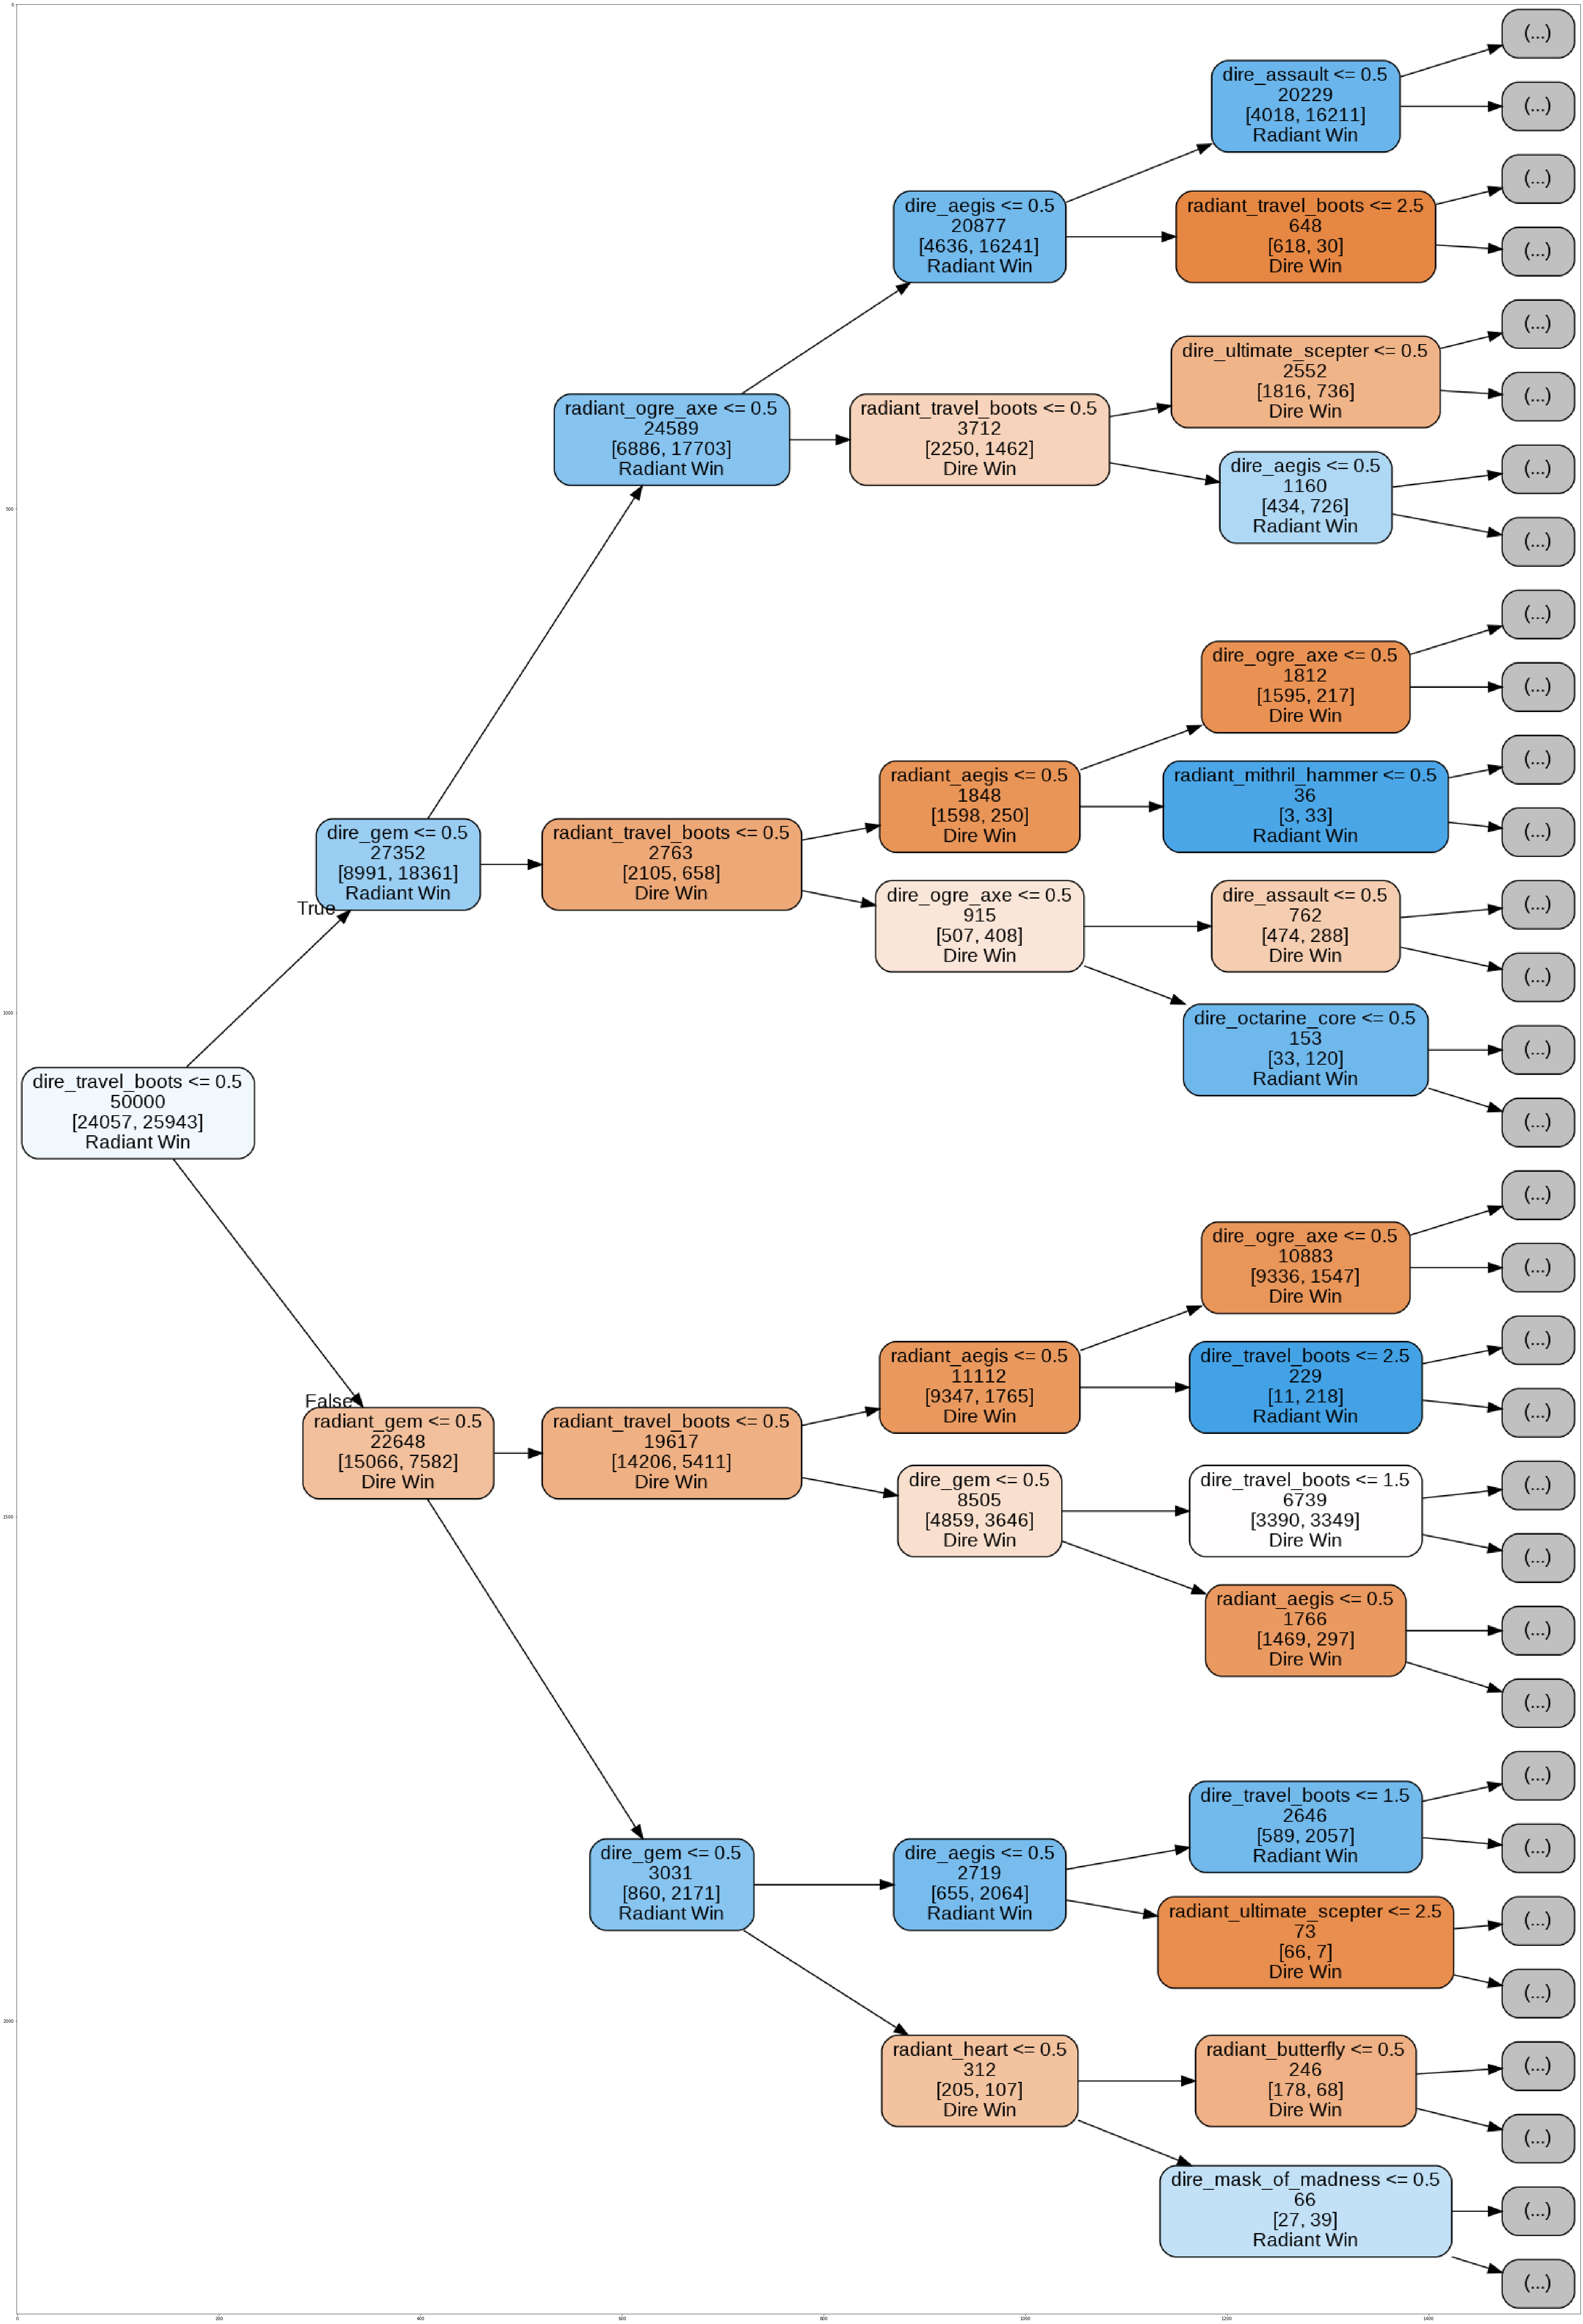

In [ ]:
dt2 = build_decision_tree(X=X2, y=y, depth=10)

In [ ]:
def get_tree_stats(dt2):
    feature_importances = dict(zip(X2.columns, dt2.feature_importances_))
    feature_importances = pd.Series(feature_importances).sort_values(ascending=False)
    return feature_importances.iloc[feature_importances.nonzero()]

get_tree_stats(dt2).head(20)

dire_travel_boots          0.203296
dire_gem                   0.104912
radiant_travel_boots       0.104189
radiant_gem                0.077946
radiant_ogre_axe           0.063106
dire_aegis                 0.059130
dire_assault               0.047586
radiant_Unknown            0.040938
radiant_aegis              0.033103
dire_butterfly             0.028872
dire_ogre_axe              0.026145
radiant_assault            0.020033
dire_Unknown               0.018924
dire_guardian_greaves      0.018151
dire_ultimate_scepter      0.013646
radiant_butterfly          0.012253
radiant_monkey_king_bar    0.010705
dire_abyssal_blade         0.010489
radiant_abyssal_blade      0.007779
dire_moon_shard            0.007702
dtype: float64

**Model 3 Insight**

As can be see, we have obtained a CV score of 83.9% and Accuracy at 83.2% - way above the 50-55% split. 
This shows that, the items are more predictive to gain victory or even defeat in DOTA 2 rather than Heroes. 

Important items are:

1. Boots of Travel

2. Gem of True Sight

3. Ogre Axe

4. Aegis (from Roshan)

5. Assault Cuirass
